In [11]:
import numpy as np

from neuralogic.core import Template, Backend, Relation, Var
from neuralogic.utils.data import Data, Dataset
from neuralogic.core.settings import Settings, ErrorFunction, Optimizer
from neuralogic.nn import get_evaluator

from IPython.display import clear_output
import matplotlib.pyplot as plt

# Data preparation

In [12]:
src = np.array([
    1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7, 7, 7, 8, 8, 9, 10, 10, 10, 11,
    12, 12, 13, 13, 13, 13, 16, 16, 17, 17, 19, 19, 21, 21, 25, 25, 27, 27,
    27, 28, 29, 29, 30, 30, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32,
    32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33
])

dst = np.array([
    0, 0, 1, 0, 1, 2, 0, 0, 0, 4, 5, 0, 1, 2, 3, 0, 2, 2, 0, 4, 5,
    0, 0, 3, 0, 1, 2, 3, 5, 6, 0, 1, 0, 1, 0, 1, 23, 24, 2, 23, 24, 2,
    23, 26, 1, 8, 0, 24, 25, 28, 2, 8, 14, 15, 18, 20, 22, 23, 29, 30,
    31, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 26, 27, 28, 29, 30, 31, 32
])

u = np.concatenate([src, dst])
v = np.concatenate([dst, src])
indices = [[i] for i in range(34)]

train_dataset = Dataset(data=[Data(x=np.ones((34, 1)), edge_index=[u, v], y=[[-1], [1]], y_mask=[[0], [33]])])
test_dataset = Dataset(data=[Data(x=np.ones((34, 1)), edge_index=[u, v], y=indices, y_mask=indices)])

# Model

In [13]:
settings = Settings(epochs=300, error_function=ErrorFunction.SQUARED_DIFF, optimizer=Optimizer.SGD)

In [14]:
template = Template()


template.add_rules([(Relation.node_feature_embed(i)[10, 1] <= Relation.node_feature(Var.X)) for i in range(32)])

template.add_rule(Relation.gcn_1(Var.X)[10, 10] <= (Relation.node_feature_embed(Var.Y), Relation.edge(Var.X, Var.Y)))
template.add_rule(Relation.gcn_2(Var.X)[10, 10] <= (Relation.gcn_1(Var.Y), Relation.edge(Var.X, Var.Y)))
template.add_rule(Relation.predict(Var.X)[np.ones((1, 10))].fixed() <= (Relation.gcn_2(Var.X)))

evaluator = get_evaluator(template, Backend.DYNET, settings)

# Training

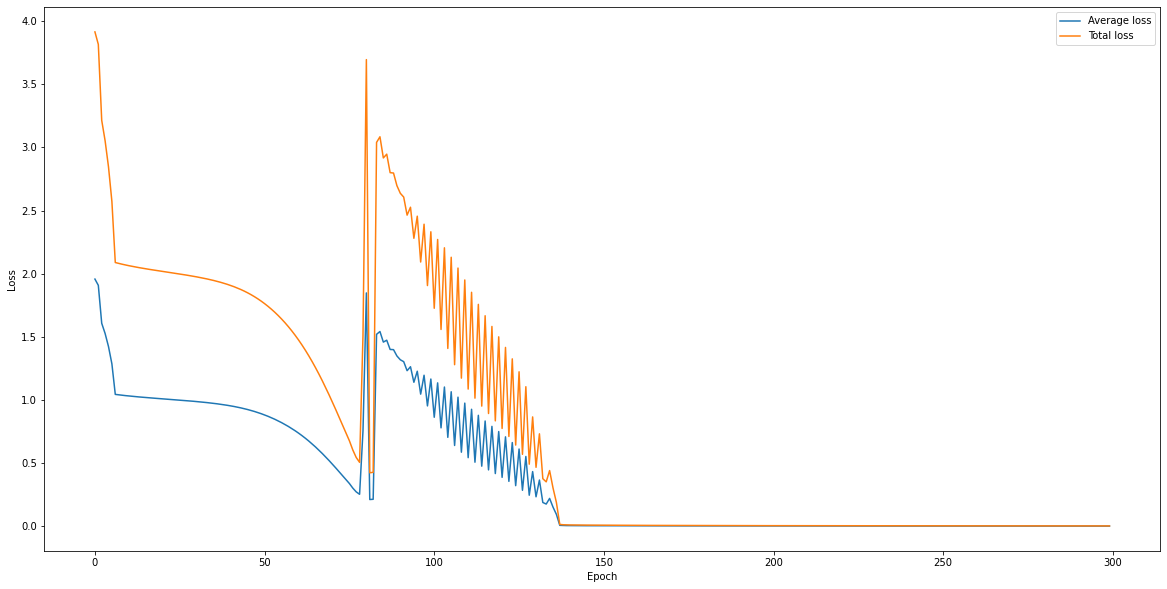

In [15]:
average_losses = []
total_losses = []


for epoch, (current_total_loss, number_of_samples) in enumerate(evaluator.train(train_dataset)):
    clear_output(wait=True)
    plt.ylabel("Loss")
    plt.xlabel("Epoch")

    average_loss = current_total_loss / number_of_samples
    
    average_losses.append(average_loss)
    total_losses.append(current_total_loss)
    
    plt.plot(average_losses, label="Average loss")
    plt.plot(total_losses, label="Total loss")
    plt.legend()
    plt.pause(0.01)
    plt.show()

In [16]:
print("Total loss:", current_total_loss)

Total loss: 0.002652718569152057


# Testing

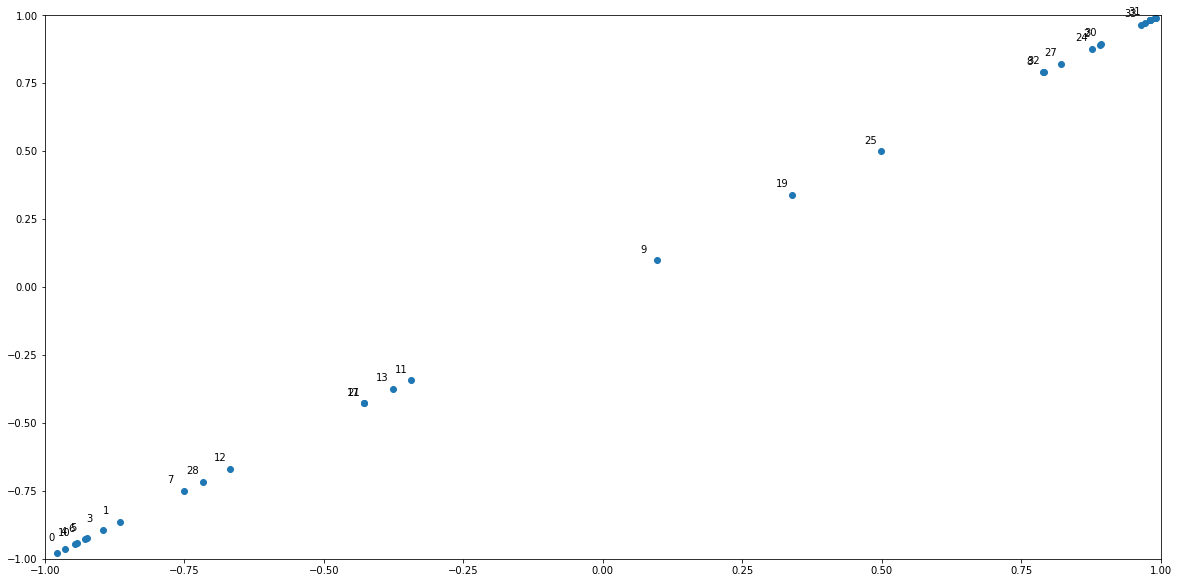

In [17]:
predicts = []
plt.rcParams["figure.figsize"] = (20,10)

for target, pred in evaluator.test(test_dataset):    
    predicts.append([pred[0][0]])


fig, ax = plt.subplots()
ax.scatter(predicts, predicts)

for i, val in enumerate(predicts):
    ax.annotate(str(i), (val[0] - 0.03, val[0] + 0.03))

plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.show()

In [18]:
for i, val in enumerate(predicts):
    print(f"Id {i} Value: {val[0]} Class: {-1 if val[0] <= 0 else 1}")

Id 0 Value: -0.9635084867477417 Class: -1
Id 1 Value: -0.8656527400016785 Class: -1
Id 2 Value: 0.8910409808158875 Class: 1
Id 3 Value: -0.895122766494751 Class: -1
Id 4 Value: -0.9425194263458252 Class: -1
Id 5 Value: -0.9248720407485962 Class: -1
Id 6 Value: -0.9284723401069641 Class: -1
Id 7 Value: -0.7504560351371765 Class: -1
Id 8 Value: 0.7895171642303467 Class: 1
Id 9 Value: 0.09762758761644363 Class: 1
Id 10 Value: -0.9461283087730408 Class: -1
Id 11 Value: -0.3435342013835907 Class: -1
Id 12 Value: -0.6677882671356201 Class: -1
Id 13 Value: -0.37644845247268677 Class: -1
Id 14 Value: 0.981139600276947 Class: 1
Id 15 Value: 0.981139600276947 Class: 1
Id 16 Value: -0.9787911176681519 Class: -1
Id 17 Value: -0.42820271849632263 Class: -1
Id 18 Value: 0.981139600276947 Class: 1
Id 19 Value: 0.3397933542728424 Class: 1
Id 20 Value: 0.981139600276947 Class: 1
Id 21 Value: -0.42820271849632263 Class: -1
Id 22 Value: 0.981139600276947 Class: 1
Id 23 Value: 0.9914818406105042 Class: 1
